# Modelling sky luminance

In this tutorial, we will show how astk can be used to model sky luminance, that is how to input natural light conditions for simulating light interception

In [32]:
from alinea.astk.sky_map import sky_grid, show_sky, sky_turtle, sky_map, sky_dirs
from alinea.astk.meteorology.sky_luminance import sky_luminance
from alinea.astk.meteorology.sky_irradiance import sky_irradiance

## Estimate sky irradiance

By default , astk simulate one day long clear sky irradiance at Montpellier, the 21 of June 2000.
For computing sky irradiance at your location or for longer/shorter perido of time, see 'Modeling sky irradiance' companion tutorial

In [33]:
sky_irr = sky_irradiance()
sky_irr

,sun_azimuth,sun_zenith,sun_elevation,ghi,dni,dhi,ppfd
2000-06-21 07:00:00+02:00,64.964943,82.113168,7.886832,60.946465,92.041199,48.316857,148.294639
2000-06-21 08:00:00+02:00,74.426178,71.957421,18.042579,229.864545,453.118711,89.522953,504.948469
2000-06-21 09:00:00+02:00,83.866975,61.281260,28.718740,416.105120,671.771159,93.312118,873.937767
2000-06-21 10:00:00+02:00,94.061489,50.403526,39.596474,591.750512,751.066148,113.038550,1212.231017
2000-06-21 11:00:00+02:00,106.318067,39.689358,50.310642,741.184658,782.891568,138.735360,1496.174934
2000-06-21 12:00:00+02:00,123.250892,29.785355,60.214645,852.932174,778.469936,177.303988,1707.180678
2000-06-21 13:00:00+02:00,149.893038,22.213724,67.786276,918.828032,787.889552,189.415600,1831.279539
2000-06-21 14:00:00+02:00,188.216321,20.077412,69.922588,934.150316,785.467446,196.415993,1860.110781
2000-06-21 15:00:00+02:00,222.570039,24.861968,65.138032,897.808460,790.895864,180.210219,1791.714236
2000-06-21 16:00:00+02:00,244.497975,33.670653,56.329347,812.392859,781.474663,162.019789,1630.727935


## Estimate sky luminance

* Sky luminance is estimated from sky irradiances, using Perez all weather sky model (R. Perez, R. Seals, J. Michalsky, "All-weather model for sky luminance distribution—Preliminary configuration and validation", Solar Energy, Volume 50, Issue 3, 1993, Pages 235-245)
* Luminance is computed every steradian of the sky hemisphere
* For other strategies, see 'sky_luminance modeling strategies' companion tutorial

In [34]:
grid=sky_grid()
lum=sky_luminance(grid, 'all_weather', sky_irr)

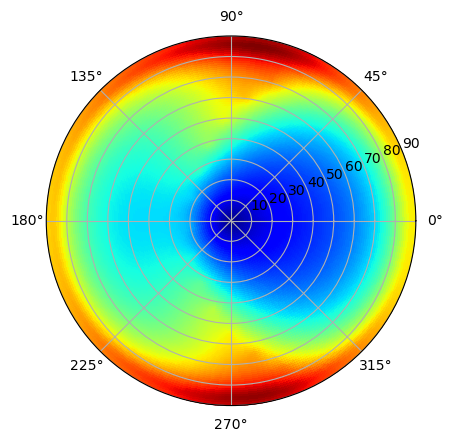

In [35]:
show_sky(grid, lum)

## Define sky discretisation

Sky discretisation allow to split the sky in a limited number of direction for efficiency of light modelling.
You can use football like dicretisation (sky_turtle) or a latitude/longitude regular grid (sky_dirs)

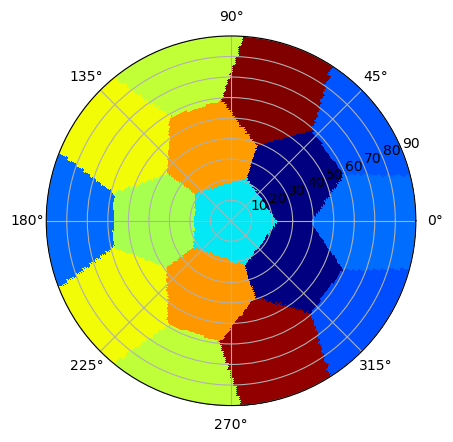

In [36]:
sectors = sky_turtle(16)
# sectors=sky_dirs(30,30)
skylights, skymap = sky_map(grid, lum, sectors)
show_sky(grid,skymap)

## Estimate normalised ligth sources and light energy

light sources are given as elevation, azimuth, irradiance tuples, normalised by global horizontal irradiance over the considered period

In [37]:
azimuth, zenith,_,_,_=grid
sky_sources = 90 - zenith, azimuth, skylights
list(zip(*sky_sources))

[(90.0, 0.0, 0.055656409336818494),
 (89.0, 1.0, 0.0492460598900486),
 (88.0, 2.0, 0.09029268282616403),
 (87.0, 3.0, 0.07103702590687165),
 (86.0, 4.0, 0.07109031672143143),
 (85.0, 5.0, 0.08932458026884416),
 (84.0, 6.0, 0.036699781202782965),
 (83.0, 7.0, 0.07666293096915303),
 (82.0, 8.0, 0.06638709997775812),
 (81.0, 9.0, 0.07671032976934453),
 (80.0, 10.0, 0.036779034802281174),
 (79.0, 11.0, 0.047864811098967695),
 (78.0, 12.0, 0.06805303708057643),
 (77.0, 13.0, 0.04896869574239473),
 (76.0, 14.0, 0.06771838256788859),
 (75.0, 15.0, 0.04750882183867402)]

* Ligth energy can be computed to unscale the values by averaging over sky irradiances for irradiance estimates, or by summing I*dt for total energy estimate
* The following line compute mean pppfd (micromolPAR.m-2.s-1), and total energy over that day (MJ.m-2)

In [38]:
sky_irr.ppfd.mean(), sky_irr.ghi.sum() * 3600 / 1e5

(1109.4758088961805, 294.2401049406819)